## BM 336546 - HW2: Adi and Efrat

### Theory Questions-

##### Q1-
Model performance is more important evaluation metric than accuracy. 
Accuracy does not work well when there are unequal number of samples belonging to each class, which is the case in most datasets, classification accuracy can give us the false sense of achieving high accuracy resulting from imbalanced classes. Model performance is our way to know how good our model would be with new data. If the model accuracy is good and the performance is not, it means that our model can only work with the original training dataset. 
For example a cancer detection model. Let’s say out of 100, 90 of the patients don’t have cancer and the remaining 10 have it. Detecting everyone as not having cancer gives an accuracy of 90% but misses the patients that are sick and need treatment.

##### Q2-
The pros in using only BP and BMI features is that we are training a classifier with the most relevant features that can predict a heart attack, it is easier to visualize the data with less features and the computing time would be faster. The cons of this model is that we can miss relevant data by not using all of the features, thus compromising the model performance.
The pros in using all of the features is that we have more information for each patient and we could predict better whether a patient is going to suffer a heart attack or not. The cons of this classifier is that some of the features can be irrelevant or redundant, too many features can obstruct interpretability and be computationaly expensive.

##### Q3-
It depends... SVM works well with unstructured and semi-structured data like text and images, it is based on geometrical properties of the data and there is a lower risk of overfitting.
If it is difficult to distinguish the biopsies by looking at the features it can indicate that the features are not linearly seperable, thus SVM (the kernel trick) can make the data separable.
If we have a high number of features non-linear SVM can be computationally expensive and might lead to
overfitting, linear SVM could make the data seperable in a higer dimension.

##### Q4- 
SVM tries to finds the best margin that separates the classes and thus reduces the risk of error on the data, while logistic regression can have different decision boundaries with different weights that are near the optimal point. LR works well with already identified independent variables and SVM with unstructured and semi-structured data. LR is based on statistical approaches while SVM is based on geometrical properties of the data. Moreover, LR is more vulnerable to overfitting than SVM.
Logistic regression does't have many hyperparameters to tune. We can improve performance by using different solvers or regularization (penalty). SVM provides larger number of hyperparameters to tune, like the choice of kernel that controls the projection of the variables, the penalty (C) that controls the trade-off between decision boundary and misclassification term and gamma which decides how much curvature we want in a decision boundary.

## Coding Assignment-

#### 1) Loading the data and preprocessing:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
import seaborn as sns
random.seed(10)

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, hinge_loss, confusion_matrix, plot_confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder
T1D_dataset = pd.read_csv(file) # load the data
T1D_dataset = T1D_dataset.dropna() #removing patients with missing values

#section 4 - converting the data to one hot vector:
T1D_dataset = pd.get_dummies(data=T1D_dataset, prefix=None, drop_first=True) #dummy coding - converting the data to binary

T1D_features = T1D_dataset[['Age','Gender_Male','Increased Urination_Yes','Increased Thirst_Yes','Sudden Weight Loss_Yes','Weakness_Yes','Increased Hunger_Yes',
                              'Genital Thrush_Yes','Visual Blurring_Yes','Itching_Yes','Irritability_Yes','Delayed Healing_Yes','Partial Paresis_Yes',
                              'Muscle Stiffness_Yes','Hair Loss_Yes','Obesity_Yes','Family History']]
diagnosis = T1D_dataset[['Diagnosis_Positive']]

#### 2) Train-test split:

In [3]:
x_train, x_test, y_train, y_test = train_test_split(T1D_features, np.ravel(diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(diagnosis))

#### 3) Data visualization:

##### a. table:

In [4]:
dic_train = {}
dic_test = {}
dic_delta = {}
units = []
for col in T1D_features.columns:        
    dic_train[col] = round(100 * sum(x_train[col])/len(x_train[col]),2)
    dic_test[col] = round(100 * sum(x_test[col])/len(x_test[col]),2)
    dic_delta[col] = dic_train[col] - dic_test[col]
    units.append('%')
dic_train['Age'] = round(sum(x_train['Age'])/len(x_train['Age']),2)
dic_test['Age'] = round(sum(x_test['Age'])/len(x_test['Age']),2)
dic_delta['Age'] = dic_train['Age'] - dic_test['Age']
units[0] = 'years'
table = pd.DataFrame(dic_train.items(), columns=['Feature','Train'])
df_test = pd.DataFrame(dic_test.items(), columns=['Feature','Test'])
df_delta = pd.DataFrame(dic_delta.items(), columns=['Feature','Delta'])
table['Test'] = df_test['Test']
table['Delta'] = df_delta['Delta']
table['units'] = units
print(table)

                    Feature  Train   Test  Delta  units
0                       Age  48.23  47.23   1.00  years
1               Gender_Male  63.40  61.90   1.50      %
2   Increased Urination_Yes  49.76  48.57   1.19      %
3      Increased Thirst_Yes  45.45  40.95   4.50      %
4    Sudden Weight Loss_Yes  40.91  43.81  -2.90      %
5              Weakness_Yes  58.37  59.05  -0.68      %
6      Increased Hunger_Yes  45.69  44.76   0.93      %
7        Genital Thrush_Yes  22.73  20.00   2.73      %
8       Visual Blurring_Yes  44.98  42.86   2.12      %
9               Itching_Yes  49.28  45.71   3.57      %
10         Irritability_Yes  25.12  20.95   4.17      %
11      Delayed Healing_Yes  47.37  40.00   7.37      %
12      Partial Paresis_Yes  42.58  43.81  -1.23      %
13     Muscle Stiffness_Yes  36.60  40.00  -3.40      %
14            Hair Loss_Yes  34.69  34.29   0.40      %
15              Obesity_Yes  15.79  20.95  -5.16      %
16           Family History  49.28  57.14  -7.86

##### a.i - 
Imbalance of features between train and test sets can lead to high accuracy but to low cross-validation accuracy. The high accuracy score is misleading, the imbalanced data causes the model to predict the majority class in all cases (as explained in theory questions-Q1).
##### a.ii - 
In order to solve the imbalance problem we can: rerandomize the data again, under-sampling or over-sampling the dataset, if possible adding more data to balance the datasets.

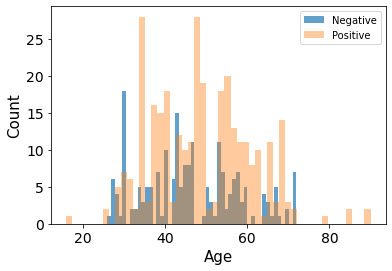

In [5]:
bins = 50
feat = 'Age'
idx_1 = (diagnosis == 0).index[(diagnosis == 0)['Diagnosis_Positive'] == True].tolist()
idx_2 = (diagnosis == 1).index[(diagnosis == 1)['Diagnosis_Positive'] == True].tolist()
plt.hist(T1D_features[feat].loc[idx_1], bins, alpha=0.7, label='Negative')
plt.hist(T1D_features[feat].loc[idx_2], bins, alpha=0.4, label='Positive')
plt.xlabel(feat)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

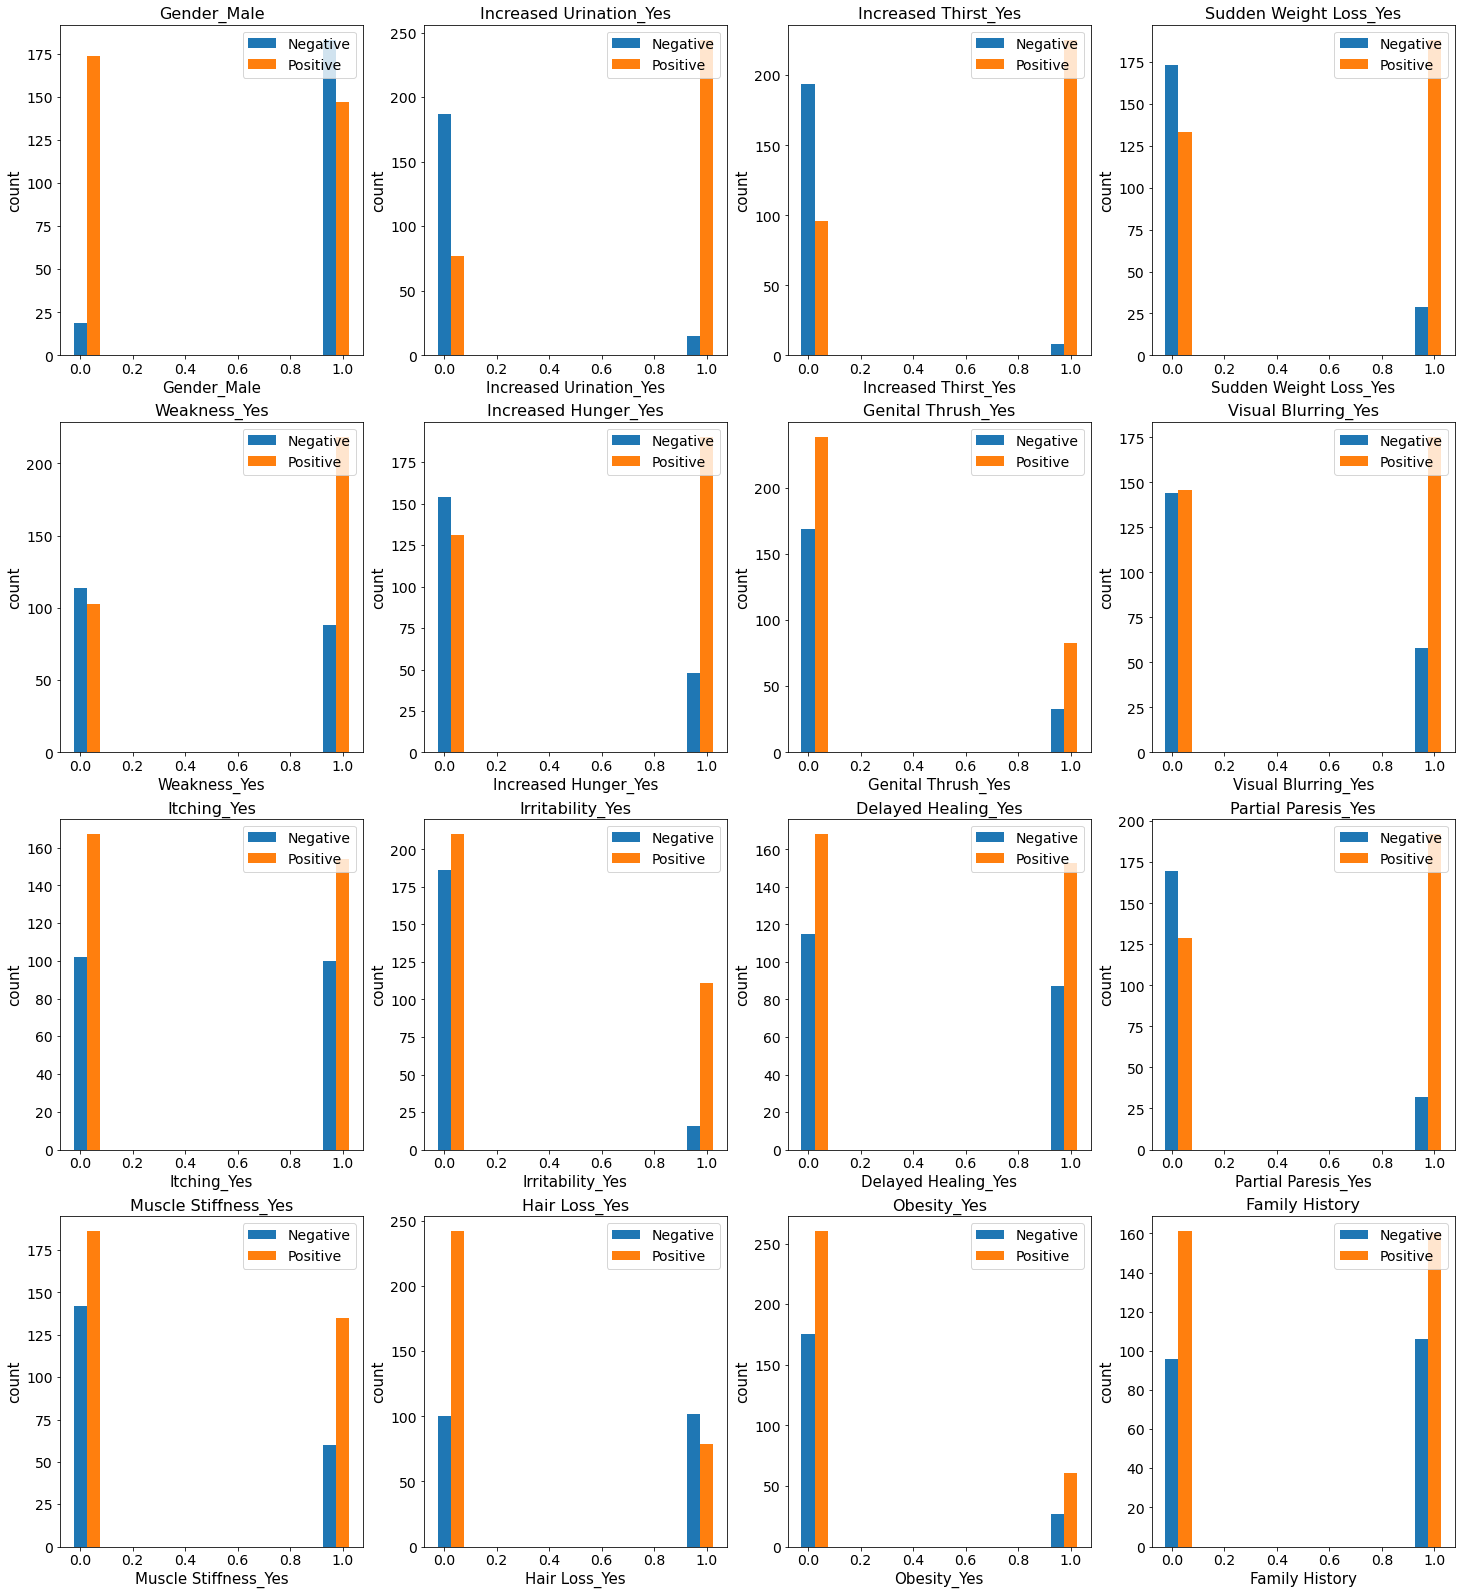

In [6]:
bins = 20
idx_1 = (diagnosis == 0).index[(diagnosis == 0)['Diagnosis_Positive'] == True].tolist()
idx_2 = (diagnosis == 1).index[(diagnosis == 1)['Diagnosis_Positive'] == True].tolist()
fig, axs = plt.subplots(4,4,figsize=(25,28))
i,j = [0, 0]
for col in T1D_features.columns:
    if col!='Age':
        axs[i,j].hist(T1D_features[col].loc[idx_1], bins, label='Negative', align='left')
        axs[i,j].hist(T1D_features[col].loc[idx_2], bins, label='Positive',align='right')
        axs[i,j].set_title(col)
        axs[i,j].set(xlabel=col,ylabel='count')
        axs[i,j].legend(loc='upper right',fontsize=14)
        j+=1
        if (j>3):
            i+=1
            j=0
plt.show()

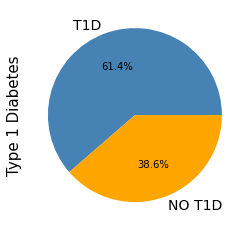

In [7]:
diagnosis.value_counts().plot(kind="pie", labels=['T1D','NO T1D'], colors = ['steelblue','orange'], autopct='%1.1f%%', ylabel='Type 1 Diabetes') 
plt.show()

##### d.i - 
We saw that family history and delayed healing are almost equally distributed between both positive and negative T1D patients and therefore they are not affecting the prediction of the diagnosis. As stated in the begining of the exercise, T1D is thought to be caused by genetic and autoimmune dysfunction. Therefore, we did not expect this outcome.
##### d.ii - 
The features that we feel will be important to our model are: Increased Urination and Increased Thirst. We can see that most of the positive T1D patients answer yes for those features and most of the negative patients answered no. Meaning these are the two most helpful features in predicting T1D.

#### 4) Encode all the data- done in section 1

#### 5) Machine Learning Models:

In [8]:
scaler = StandardScaler()

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

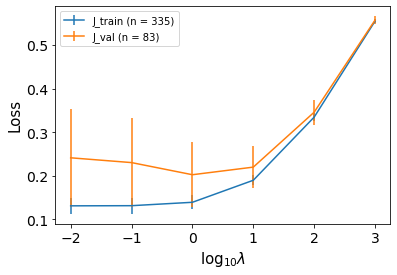

In [9]:
lmbda = np.array([0.01, 0.1, 1, 10, 100, 1000])
J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    logreg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    
    k = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits) 
    
    for train_index, val_index in skf.split(x_train, y_train):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val_fold = scaler.transform(x_val_fold)
        logreg.fit(x_train_fold, y_train_fold)
        
        y_pred_train = logreg.predict_proba(x_train_fold)
        J_train_fold[k] = log_loss(y_train_fold, y_pred_train)
        y_pred_val = logreg.predict_proba(x_val_fold)
        J_val_fold[k] = log_loss(y_val_fold, y_pred_val)
        k += 1
        
    J_train[0, idx] = J_train_fold.mean()
    J_train[1, idx] = J_train_fold.std()
    J_val[0, idx] = J_val_fold.mean()
    J_val[1, idx] = J_val_fold.std()

plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])

In [10]:
#From tutorial 5-
def max_data_ratio(n_splits,x_train,y_train):
    data_ratio_orig = np.linspace(0.01,0.98,num=100) 
    k_min = 0
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size=1-data_ratio_orig[k_min], random_state=10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5].shape[0] <= n_splits):
        k_min += 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size=1-data_ratio_orig[k_min], random_state=10,
                                 stratify=y_train)  
    k_max = 99
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size=1-data_ratio_orig[k_max], random_state=10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5].shape[0] <= n_splits):
        k_max -= 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size=1-data_ratio_orig[k_max], random_state=10,
                                 stratify=y_train)
    return np.linspace(data_ratio_orig[k_min],data_ratio_orig[k_max],num=100)

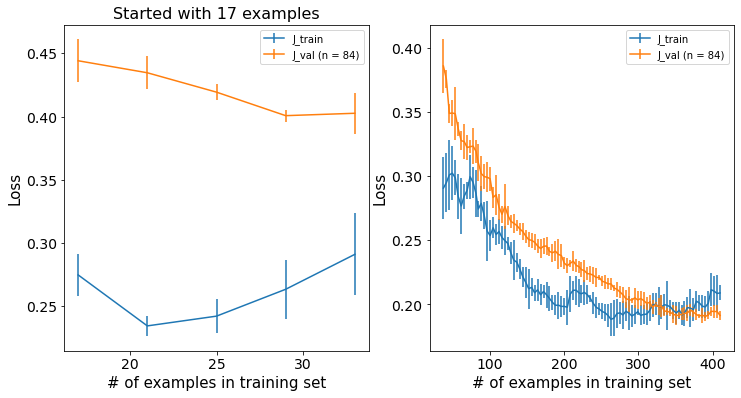

In [11]:
x_train_orig, x_val_orig, y_train_orig, y_val_orig = train_test_split(x_train, y_train, test_size=0.2, random_state=10, stratify=y_train)
data_ratio = max_data_ratio(n_splits, x_train, y_train)
J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

for idx, curr_ratio in enumerate(data_ratio):
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=0.1, max_iter=2000)
    k = 0 # index per split
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    m_x_train, _, m_y_train, _ = train_test_split(x_train_orig, y_train_orig, test_size =1-curr_ratio, 
                                                  random_state = 10, stratify=y_train_orig)
    for train_index, val_index in skf.split(m_x_train, m_y_train):
        x_train_fold = m_x_train.iloc[train_index]
        y_train_fold = m_y_train[train_index]
        
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val = scaler.transform(x_val_orig)
        log_reg.fit(x_train_fold, y_train_fold)
        
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[k] = log_loss(y_train_fold,y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val)
        J_val_fold[k] = log_loss(y_val_orig,y_pred_val) 
        k += 1
        
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_train[0,0:5], yerr=J_train[1,0:5])
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_val[0,0:5], yerr=J_val[1,0:5])
axes[0].set_xlabel('# of examples in training set')
axes[0].set_ylabel('Loss')
axes[0].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
axes[0].set_title('Started with ' + str(int(np.ceil(data_ratio[0]*x_train.shape[0]))) + ' examples')
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes[1].set_xlabel('# of examples in training set')
axes[1].set_ylabel('Loss')
axes[1].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

In [12]:
def SVM(pipe, kernel, skfold, x_train, y_train):
    C = np.array([0.01, 0.1, 1, 10, 100, 1000])
    svm = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': kernel}, cv=skfold,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                       refit='roc_auc', verbose=3, return_train_score=True)
    svm.fit(x_train, y_train)
    best_svm = svm.best_estimator_
    best_params = svm.best_params_
    return (best_svm, best_params)

In [13]:
#Linear SVM:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
[best_svm_lin, svm_lin_params] = SVM(pipe, ['linear'], skf, x_train, y_train)
print(svm_lin_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.905), f1=(train=0.923, test=0.918), precision=(train=0.973, test=0.978), recall=(train=0.878, test=0.865), roc_auc=(train=0.978, test=0.992), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.937, test=0.857), f1=(train=0.947, test=0.870), precision=(train=0.984, test=1.000), recall=(train=0.912, test=0.769), roc_auc=(train=0.988, test=0.954), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.833), f1=(train=0.924, test=0.848), precision=(train=0.968, test=0.951), recall=(train=0.883, test=0.765), roc_auc=(train=0.981, test=0.967), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.896, test=0.880), f1=(train=0.911, test=0.900), precision=(train=0.952, test=0.918), recall=(train=0.874, test=0.882), roc_auc=(train=0.979, test=0.979), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.940), f1=(train=0.925, test=0.952), precision=(train=0.958, test=0.926), recall=(train=0.893, test=0.980), roc_auc=(train=0.977, test=0.988), total=   0.1s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.952, test=0.952), f1=(train=0.960, test=0.962), precision=(train=0.975, test=0.962), recall=(train=0.946, test=0.962), roc_auc=(train=0.980, test=0.988), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.958, test=0.905), f1=(train=0.966, test=0.920), precision=(train=0.975, test=0.958), recall=(train=0.956, test=0.885), roc_auc=(train=0.988, test=0.957), total=   0.1s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.958, test=0.893), f1=(train=0.966, test=0.911), precision=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   56.2s finished


In [14]:
#Non-linear SVM:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
[best_svm_nonlin, svm_nonlin_params] = SVM(pipe, ['rbf', 'poly'], skf, x_train, y_train)
print(svm_nonlin_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.973, test=0.972), total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.01, svm__kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.975, test=0.962), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.977, test=0.936), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.975, test=0.971), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.7s finished


In [15]:
def performance_calc(x_test, y_test, y_pred_test, y_pred_proba_test, y_pred_dec, classifier):
    calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
    calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
    calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
    calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
    
    TN = calc_TN(y_test, y_pred_test)
    TP = calc_TP(y_test, y_pred_test)
    FN = calc_FN(y_test, y_pred_test)
    FP = calc_FP(y_test, y_pred_test)
    
    PPV = TP/(TP+FP)
    Se = TP/(TP+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*PPV*Se)/(PPV+Se)
    if (classifier == 'LR'):
        loss = log_loss(y_test, y_pred_proba_test)
    elif (classifier == 'SVM'):
        loss = hinge_loss(y_test, y_pred_dec)
    auroc = roc_auc_score(y_test, y_pred_proba_test[:,1])
    return (auroc, F1, loss, Acc)

In [16]:
#Logistic regression 1-
x_tr = scaler.fit_transform(x_train)
x_tst = scaler.transform(x_test)
logreg.fit(x_tr, y_train)
y_pred_test_logreg = logreg.predict(x_tst)
y_pred_proba_test_logreg = logreg.predict_proba(x_tst)
[auroc, F1, loss, Acc] = performance_calc(x_test, y_test, y_pred_test_logreg, y_pred_proba_test_logreg,_,'LR')

print('first logistic regression:')
print('AUROC is {:.3f}'.format(auroc))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

first logistic regression:
AUROC is 0.918
F1 is 0.81
Loss is 0.55
Accuracy is 0.72


In [17]:
#logistic regression 2:
x_trn = scaler.fit_transform(x_train)
x_tst = scaler.transform(x_test)
log_reg.fit(x_trn, y_train)
y_pred_test_lr = log_reg.predict(x_tst)
y_pred_proba_test_lr = log_reg.predict_proba(x_tst)
[auroc_lr, F1_lr, loss_lr, Acc_lr] = performance_calc(x_test, y_test, y_pred_test_lr, y_pred_proba_test_lr,_,'LR')

print('Second logistic regression:')
print('AUROC is {:.3f}'.format(auroc_lr))
print(f'F1 is {F1_lr:.2f}')
print(f'Loss is {loss_lr:.2f}')
print(f'Accuracy is {Acc_lr:.2f}')

Second logistic regression:
AUROC is 0.946
F1 is 0.91
Loss is 0.28
Accuracy is 0.89


In [18]:
#linear SVM:
y_pred_test_svm_lin = best_svm_lin.predict(x_test)
y_pred_proba_test_svm_lin = best_svm_lin.predict_proba(x_test)
y_pred_dec_test_svm_lin = best_svm_lin.decision_function(x_test)

[auroc_lin, F1_lin, loss_lin, Acc_lin] = performance_calc(x_test, y_test, y_pred_test_svm_lin, y_pred_proba_test_svm_lin,
                                                          y_pred_dec_test_svm_lin, 'SVM')

print('Linear SVM:')
print('AUROC is {:.3f}'.format(auroc_lin))
print(f'F1 is {F1_lin:.2f}')
print(f'Loss is {loss_lin:.2f}')
print(f'Accuracy is {Acc_lin:.2f}')

Linear SVM:
AUROC is 0.940
F1 is 0.91
Loss is 0.34
Accuracy is 0.90


In [19]:
#Non-linear SVM:
y_pred_test_svm_nonlin = best_svm_nonlin.predict(x_test)
y_pred_proba_test_svm_nonlin = best_svm_nonlin.predict_proba(x_test)
y_pred_dec_test_svm_nonlin = best_svm_nonlin.decision_function(x_test)
chosen_kernel = svm_nonlin_params['svm__kernel']

[auroc_nonlin, F1_nonlin, loss_nonlin, Acc_nonlin] = performance_calc(x_test, y_test, y_pred_test_svm_nonlin, y_pred_proba_test_svm_nonlin,
                                                                      y_pred_dec_test_svm_nonlin, 'SVM')

print(f'Non-linear SVM - {chosen_kernel}:')
print('AUROC is {:.3f}'.format(auroc_nonlin))
print(f'F1 is {F1_nonlin:.2f}')
print(f'Loss is {loss_nonlin:.2f}')
print(f'Accuracy is {Acc_nonlin:.2f}')

Non-linear SVM - poly:
AUROC is 0.979
F1 is 0.96
Loss is 0.17
Accuracy is 0.95


##### 5.c- Non-linear model performs best on this dataset.

#### 6) Feature Selection:

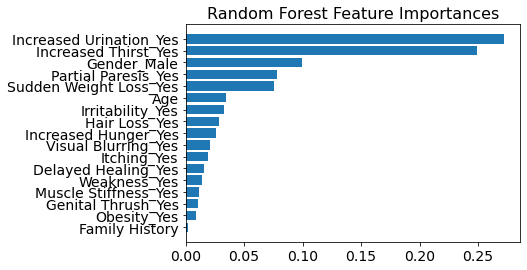

In [20]:
#Random forest:
rfc = Pipeline(steps=[('scale', StandardScaler()), ('rfc', RandomForestClassifier(max_depth=4, random_state=0, criterion='gini'))])
rfc.fit(x_train, y_train)

tree_feature_importances = (rfc.named_steps['rfc'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()
feature_names = T1D_features.columns.values

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances")
plt.show()

##### i) The two most important features according to the random forest are: Increased Urination and Increased Thirst.
##### ii)  Yes it does match up to the feature exploration as can be seen in the histograms.

#### 7) Data Separability Visualization:

In [22]:
x_train.loc[:,['Age']] = scaler.fit_transform(x_train.loc[:,['Age']])
x_test.loc[:,['Age']] = scaler.transform(x_test.loc[:,['Age']])

# apply PCA transformation
pca = PCA(n_components=2, whiten=True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

C:\Users\Adiwa\anaconda3\envs\bm-336546-hw2\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\Adiwa\anaconda3\envs\bm-336546-hw2\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [23]:
#From tutorial 9-
def plt_2d_pca(X_pca,y,title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='g')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title(title)

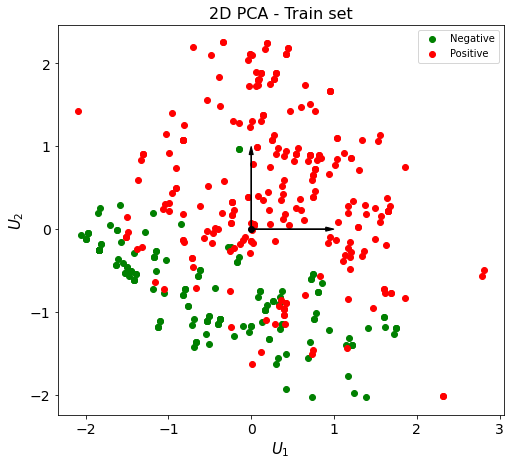

In [24]:
plt_2d_pca(x_train_pca, y_train, '2D PCA - Train set')

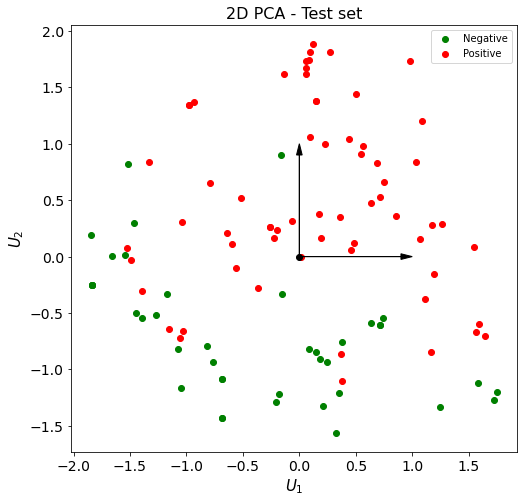

In [25]:
plt_2d_pca(x_test_pca, y_test, '2D PCA - Test set')

#### c. training the models:

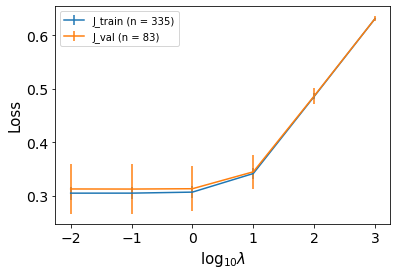

In [28]:
lmbda = np.array([0.01, 0.1, 1, 10, 100, 1000])
J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    logreg_pca = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    
    k = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits) 
    
    for train_index, val_index in skf.split(x_train_pca, y_train):
        x_train_fold, x_val_fold = x_train_pca[train_index], x_train_pca[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val_fold = scaler.transform(x_val_fold)
        logreg_pca.fit(x_train_fold, y_train_fold)
        
        y_pred_train = logreg_pca.predict_proba(x_train_fold)
        J_train_fold[k] = log_loss(y_train_fold, y_pred_train)
        y_pred_val = logreg_pca.predict_proba(x_val_fold)
        J_val_fold[k] = log_loss(y_val_fold, y_pred_val)
        k += 1
        
    J_train[0, idx] = J_train_fold.mean()
    J_train[1, idx] = J_train_fold.std()
    J_val[0, idx] = J_val_fold.mean()
    J_val[1, idx] = J_val_fold.std()

plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])

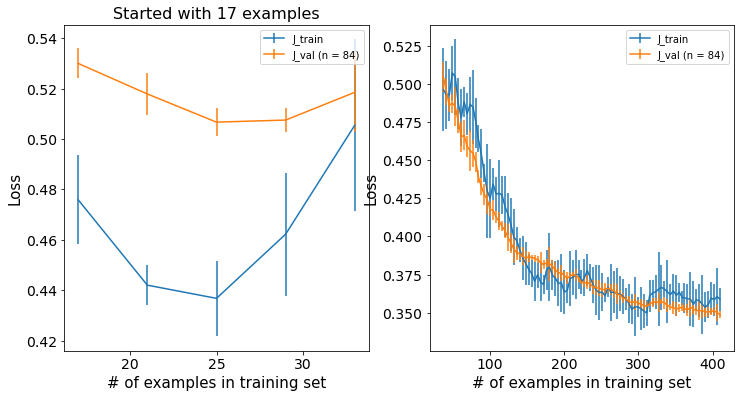

In [29]:
#Logistic regression:
x_train_reduc, x_val_reduc, y_train_reduc, y_val_reduc = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=10, stratify=y_train)

data_ratio = max_data_ratio(n_splits, x_train_pca, y_train)
J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

for idx, curr_ratio in enumerate(data_ratio):
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=0.1, max_iter=2000)
    k = 0 # index per split
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    m_x_train, _, m_y_train, _ = train_test_split(x_train_reduc, y_train_reduc, test_size=1-curr_ratio, random_state=10,
                                                  stratify=y_train_reduc)
    for train_index, val_index in skf.split(m_x_train, m_y_train):
        x_train_fold = m_x_train[train_index]
        y_train_fold = m_y_train[train_index]
        
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val = scaler.transform(x_val_reduc)
        log_reg.fit(x_train_fold, y_train_fold)
        
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[k] = log_loss(y_train_fold,y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val)
        J_val_fold[k] = log_loss(y_val_reduc,y_pred_val) 
        k += 1
        
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_train[0,0:5], yerr=J_train[1,0:5])
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_val[0,0:5], yerr=J_val[1,0:5])
axes[0].set_xlabel('# of examples in training set')
axes[0].set_ylabel('Loss')
axes[0].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
axes[0].set_title('Started with ' + str(int(np.ceil(data_ratio[0]*x_train.shape[0]))) + ' examples')
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes[1].set_xlabel('# of examples in training set')
axes[1].set_ylabel('Loss')
axes[1].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

In [30]:
#linear SVM:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('pca', pca), ('svm', svc)])
[best_svm_lin_pca, svm_lin_pca_params] = SVM(pipe, ['linear'], skf, x_train_pca, y_train)
print(svm_lin_pca_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.850, test=0.857), f1=(train=0.871, test=0.878), precision=(train=0.923, test=0.935), recall=(train=0.824, test=0.827), roc_auc=(train=0.932, test=0.948), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.838, test=0.869), f1=(train=0.862, test=0.882), precision=(train=0.904, test=1.000), recall=(train=0.824, test=0.788), roc_auc=(train=0.924, test=0.928), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.841, test=0.821), f1=(train=0.863, test=0.842), precision=(train=0.923, test=0.909), recall=(train=0.811, test=0.784), roc_auc=(train=0.942, test=0.885), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.836, test=0.807), f1=(train=0.856, test=0.830), precision=(train=0.927, test=0.907), recall=(train=0.796, test=0.765), roc_auc=(train=0.931, test=0.942), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.848, test=0.831), f1=(train=0.867, test=0.863), precision=(train=0.938, test=0.863), recall=(train=0.806, test=0.863), roc_auc=(train=0.926, test=0.945), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.853, test=0.869), f1=(train=0.877, test=0.891), precision=(train=0.906, test=0.918), recall=(train=0.849, test=0.865), roc_auc=(train=0.936, test=0.944), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.853, test=0.881), f1=(train=0.879, test=0.894), precision

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.0s finished


In [31]:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('pca', pca), ('svm', svc)])
[best_svm_nonlin_pca, svm_nonlin_pca_params] = SVM(pipe, ['rbf', 'poly'], skf, x_train_pca, y_train)
print(svm_nonlin_pca_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.933, test=0.939), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.932, test=0.912), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.939, test=0.897), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.930, test=0.942), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.930, test=0.933), total=   0.1s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.737, test=0.714), f1=(train=0.821, test=0.800), precision=(train=0.704, test=0.706), recall=(train=0.985, test=0.923), roc_auc=(train=0.935, test=0.916), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.722, test=0.774), f1=(train=0.811, test=0.846), precision=(train=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.9s finished


{'svm__C': 1000.0, 'svm__kernel': 'rbf'}


In [32]:
#Logistic regression 1-
x_tr_pca = scaler.fit_transform(x_train_pca)
x_tst_pca = scaler.transform(x_test_pca)
logreg_pca.fit(x_tr_pca, y_train)
y_pred_test_logreg = logreg_pca.predict(x_tst_pca)
y_pred_proba_test_logreg = logreg_pca.predict_proba(x_tst_pca)
[auroc, F1, loss, Acc] = performance_calc(_, y_test, y_pred_test_logreg, y_pred_proba_test_logreg,_,'LR')

print('first logistic regression:')
print('AUROC is {:.3f}'.format(auroc))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

first logistic regression:
AUROC is 0.911
F1 is 0.76
Loss is 0.63
Accuracy is 0.61


In [33]:
#Logistic regression 2:
x_tr_pca = scaler.fit_transform(x_train_pca)
x_tst_pca = scaler.transform(x_test_pca)

log_reg.fit(x_tr_pca, y_train)
y_pred_test_lr = log_reg.predict(x_tst_pca)
y_pred_proba_test_lr = log_reg.predict_proba(x_tst_pca)
[auroc_lr, F1_lr, loss_lr, Acc_lr] = performance_calc(_, y_test, y_pred_test_lr, y_pred_proba_test_lr,_, 'LR')

print('Second logistic regression with PCA:')
print('AUROC is {:.3f}'.format(auroc_lr))
print(f'F1 is {F1_lr:.2f}')
print(f'Loss is {loss_lr:.2f}')
print(f'Accuracy is {Acc_lr:.2f}')

Second logistic regression with PCA:
AUROC is 0.915
F1 is 0.85
Loss is 0.38
Accuracy is 0.82


In [34]:
#linear SVM:
y_pred_test_svm_lin_pca = best_svm_lin_pca.predict(x_test_pca)
y_pred_proba_test_svm_lin_pca = best_svm_lin_pca.predict_proba(x_test_pca)
y_pred_dec_test_svm_lin_pca = best_svm_lin_pca.decision_function(x_test_pca)
[auroc_lin_pca, F1_lin_pca, loss_lin_pca, Acc_lin_pca] = performance_calc(x_test_pca,y_test, y_pred_test_svm_lin_pca, y_pred_proba_test_svm_lin_pca,
                                                                          y_pred_dec_test_svm_lin_pca, 'SVM')

print('Linear SVM with PCA:')
print('AUROC is {:.3f}'.format(auroc_lin_pca))
print(f'F1 is {F1_lin_pca:.2f}')
print(f'Loss is {loss_lin_pca:.2f}')
print(f'Accuracy is {Acc_lin_pca:.2f}')

Linear SVM with PCA:
AUROC is 0.915
F1 is 0.85
Loss is 0.39
Accuracy is 0.82


In [35]:
#Non-linear SVM
y_pred_test_svm_nonlin_pca = best_svm_nonlin_pca.predict(x_test_pca)
y_pred_proba_test_svm_nonlin_pca = best_svm_nonlin_pca.predict_proba(x_test_pca)
y_pred_dec_test_svm_nonlin_pca = best_svm_nonlin_pca.decision_function(x_test_pca)
chosen_kernel = svm_nonlin_pca_params['svm__kernel']
[auroc_nonlin, F1_nonlin, loss_nonlin, Acc_nonlin] = performance_calc(x_test_pca, y_test, y_pred_test_svm_nonlin, y_pred_proba_test_svm_nonlin,
                                                                     y_pred_dec_test_svm_nonlin_pca, 'SVM')

print(f'Non-linear SVM with {chosen_kernel} kernel with PCA:')
print('AUROC is {:.3f}'.format(auroc_nonlin))
print(f'F1 is {F1_nonlin:.2f}')
print(f'Loss is {loss_nonlin:.2f}')
print(f'Accuracy is {Acc_nonlin:.2f}')

Non-linear SVM with rbf kernel with PCA:
AUROC is 0.979
F1 is 0.96
Loss is 0.23
Accuracy is 0.95


In [36]:
#Selecting the best two features from Q6:
x_train_best_feat = x_train[["Increased Urination_Yes","Increased Thirst_Yes"]]
x_test_best_feat = x_test[["Increased Urination_Yes","Increased Thirst_Yes"]]

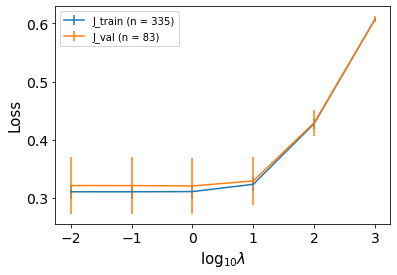

In [37]:
lmbda = np.array([0.01, 0.1, 1, 10, 100, 1000])
J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    logreg_bf = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    
    k = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits) 
    
    for train_index, val_index in skf.split(x_train_best_feat, y_train):
        x_train_fold, x_val_fold = x_train_best_feat.iloc[train_index], x_train_best_feat.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val_fold = scaler.transform(x_val_fold)
        logreg_bf.fit(x_train_fold, y_train_fold)
        
        y_pred_train = logreg_bf.predict_proba(x_train_fold)
        J_train_fold[k] = log_loss(y_train_fold, y_pred_train)
        y_pred_val = logreg_bf.predict_proba(x_val_fold)
        J_val_fold[k] = log_loss(y_val_fold, y_pred_val)
        k += 1
        
    J_train[0, idx] = J_train_fold.mean()
    J_train[1, idx] = J_train_fold.std()
    J_val[0, idx] = J_val_fold.mean()
    J_val[1, idx] = J_val_fold.std()

plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])

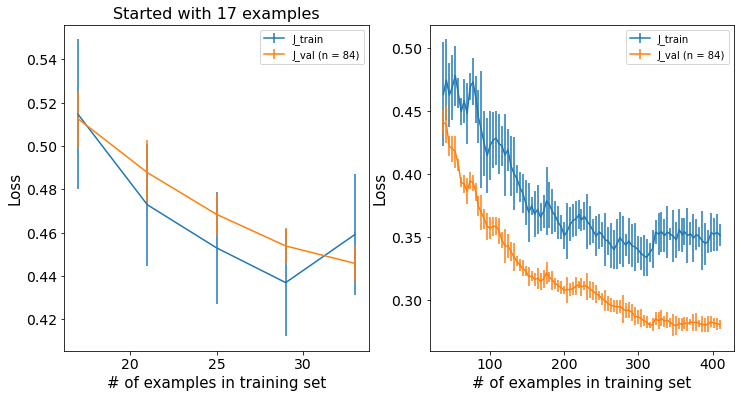

In [38]:
x_train_bf, x_val_bf, y_train_bf, y_val_bf = train_test_split(x_train_best_feat, y_train,test_size=0.2, random_state=10, stratify=y_train)
data_ratio = max_data_ratio(n_splits, x_train_best_feat, y_train)
J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

for idx, curr_ratio in enumerate(data_ratio):
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=0.1, max_iter=2000)
    k = 0 # index per split
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    m_x_train, _, m_y_train, _ = train_test_split(x_train_bf, y_train_bf, test_size=1-curr_ratio, random_state=10, stratify=y_train_bf)
    for train_index, val_index in skf.split(m_x_train, m_y_train):
        x_train_fold = m_x_train.iloc[train_index]
        y_train_fold = m_y_train[train_index]
        
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val = scaler.transform(x_val_bf)
        log_reg.fit(x_train_fold, y_train_fold)
        
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[k] = log_loss(y_train_fold,y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val)
        J_val_fold[k] = log_loss(y_val_bf,y_pred_val) 
        k += 1
        
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_train[0,0:5], yerr=J_train[1,0:5])
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_val[0,0:5], yerr=J_val[1,0:5])
axes[0].set_xlabel('# of examples in training set')
axes[0].set_ylabel('Loss')
axes[0].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
axes[0].set_title('Started with ' + str(int(np.ceil(data_ratio[0]*x_train.shape[0]))) + ' examples')
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes[1].set_xlabel('# of examples in training set')
axes[1].set_ylabel('Loss')
axes[1].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

In [39]:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
[best_svm_lin_bf, svm_lin_params_bf] = SVM(pipe, ['linear'], skf, x_train_best_feat, y_train)
print(svm_lin_params_bf)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.826, test=0.845), f1=(train=0.845, test=0.857), precision=(train=0.935, test=1.000), recall=(train=0.771, test=0.750), roc_auc=(train=0.909, test=0.925), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.841, test=0.786), f1=(train=0.859, test=0.795), precision=(train=0.942, test=0.972), recall=(train=0.790, test=0.673), roc_auc=(train=0.924, test=0.871), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.835, test=0.810), f1=(train=0.853, test=0.822), precision=(train=0.947, test=0.949), recall=(train=0.777, test=0.725), roc_auc=(train=0.917, test=0.898), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.833, test=0.819), f1=(train=0.848, test=0.845), precision=(train=0.963, test=0.891), recall=(train=0.757, test=0.804), roc_auc=(train=0.912, test=0.917), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.815, test=0.892), f1=(train=0.831, test=0.909), precision=(train=0.950, test=0.938), recall=(train=0.738, test=0.882), roc_auc=(train=0.902, test=0.959), total=   0.1s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.874, test=0.893), f1=(train=0.894, test=0.909), precisio

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.8s finished


In [40]:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
[best_svm_nonlin_bf, svm_nonlin_params_bf] = SVM(pipe, ['rbf', 'poly'], skf, x_train_best_feat, y_train)
print(svm_nonlin_params_bf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.874, test=0.893), f1=(train=0.894, test=0.909), precision=(train=0.922, test=0.957), recall=(train=0.868, test=0.865), roc_auc=(train=0.909, test=0.925), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.889, test=0.833), f1=(train=0.908, test=0.851), precision=(train=0.924, test=0.952), recall=(train=0.893, test=0.769), roc_auc=(train=0.924, test=0.871), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.880, test=0.869), f1=(train=0.900, test=0.887), precision=(train=0.928, test=0.935), recall=(train=0.874, test=0.843), roc_auc=(train=0.917, test=0.898), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ..........................

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.878, test=0.880), f1=(train=0.896, test=0.902), precision=(train=0.937, test=0.902), recall=(train=0.859, test=0.902), roc_auc=(train=0.912, test=0.917), total=   0.2s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.869, test=0.916), f1=(train=0.888, test=0.933), precision=(train=0.935, test=0.907), recall=(train=0.845, test=0.961), roc_auc=(train=0.902, test=0.959), total=   0.1s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.754, test=0.798), f1=(train=0.750, test=0.805), precision=(train=1.000, test=1.000), recall=(train=0.600, test=0.673), roc_auc=(train=0.909, test=0.925), total=   0.1s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.775, test=0.714), f1=(train=0.776, test=0.700), precision=(train=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.5s finished


In [41]:
#Logistic regression 1-
x_tr_bf = scaler.fit_transform(x_train_best_feat)
x_tst_bf = scaler.transform(x_test_best_feat)
logreg_bf.fit(x_tr_bf, y_train)
y_pred_test_logreg = logreg_bf.predict(x_tst_bf)
y_pred_proba_test_logreg = logreg_bf.predict_proba(x_tst_bf)
[auroc, F1, loss, Acc] = performance_calc(_, y_test, y_pred_test_logreg, y_pred_proba_test_logreg,_,'LR')

print('first logistic regression:')
print('AUROC is {:.3f}'.format(auroc))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

first logistic regression:
AUROC is 0.881
F1 is 0.76
Loss is 0.60
Accuracy is 0.61


In [42]:
#Logostic regression:
x_tr_best_feat = scaler.fit_transform(x_train_best_feat)
x_tst_best_feat = scaler.transform(x_test_best_feat)
log_reg.fit(x_tr_best_feat, y_train)

y_pred_test_lr = log_reg.predict(x_tst_best_feat)
y_pred_proba_test_lr = log_reg.predict_proba(x_tst_best_feat)
[auroc_lr, F1_lr, loss_lr, Acc_lr] = performance_calc(_, y_test, y_pred_test_lr, y_pred_proba_test_lr,_,'LR')

print('Second logistic regression on best two features:')
print('AUROC is {:.3f}'.format(auroc_lr))
print(f'F1 is {F1_lr:.2f}')
print(f'Loss is {loss_lr:.2f}')
print(f'Accuracy is {Acc_lr:.2f}')

Second logistic regression on best two features:
AUROC is 0.881
F1 is 0.86
Loss is 0.38
Accuracy is 0.84


In [43]:
#linear SVM:
y_pred_test_svm_lin_bf = best_svm_lin_bf.predict(x_test_best_feat)
y_pred_proba_test_svm_lin_bf = best_svm_lin_bf.predict_proba(x_test_best_feat)
y_pred_dec_test_svm_lin_bf = best_svm_lin_bf.decision_function(x_test_best_feat)
[auroc_lin_bf, F1_lin_bf, loss_lin_bf, Acc_lin_bf] = performance_calc(x_test_best_feat,y_test, y_pred_test_svm_lin_bf, y_pred_proba_test_svm_lin_bf,
                                                                          y_pred_dec_test_svm_lin_bf, 'SVM')

print('Linear SVM on best two features:')
print('AUROC is {:.3f}'.format(auroc_lin_bf))
print(f'F1 is {F1_lin_bf:.2f}')
print(f'Loss is {loss_lin_bf:.2f}')
print(f'Accuracy is {Acc_lin_bf:.2f}')

Linear SVM on best two features:
AUROC is 0.881
F1 is 0.86
Loss is 0.32
Accuracy is 0.84


In [44]:
#Non-linear SVM
y_pred_test_svm_nonlin_bf = best_svm_nonlin_bf.predict(x_test_best_feat)
y_pred_proba_test_svm_nonlin_bf = best_svm_nonlin_bf.predict_proba(x_test_best_feat)
y_pred_dec_test_svm_nonlin_bf = best_svm_nonlin_bf.decision_function(x_test_best_feat)
chosen_kernel = svm_nonlin_params_bf['svm__kernel']
[auroc_nonlin_bf, F1_nonlin_bf, loss_nonlin_bf, Acc_nonlin_bf] = performance_calc(x_test_best_feat, y_test, y_pred_test_svm_nonlin_bf, y_pred_proba_test_svm_nonlin_pca,
                                                                     y_pred_dec_test_svm_nonlin_pca, 'SVM')

print(f'Non-linear SVM with {chosen_kernel} kernel on best two features:')
print('AUROC is {:.3f}'.format(auroc_nonlin_bf))
print(f'F1 is {F1_nonlin_bf:.2f}')
print(f'Loss is {loss_nonlin_bf:.2f}')
print(f'Accuracy is {Acc_nonlin_bf:.2f}')

Non-linear SVM with poly kernel on best two features:
AUROC is 0.947
F1 is 0.86
Loss is 0.23
Accuracy is 0.84


##### section e: 
The PCA performs better than the best two features. Most training instances in high dimensional datasets are likely to be far away from each other, which means that a new instance will likely be far away from any training instance, causing predictions to be less reliable than in lower dimensional datasets. 
PCA is reducing the dimension of the dataset while maintaining as mush information as possible and this is the reason why we see better results in the PCA training.